In [ ]:

# ------ Import necessary packages ----
import networkx as nx
from collections import defaultdict
from itertools import combinations
from dwave.system.samplers import DWaveSampler
from dwave.system.composites import EmbeddingComposite
import math

# ------- Set tunable parameters -------
num_reads = 1000
gamma = 80

# ------- Set up our graph -------
G = nx.gnp_random_graph(40, 0.3)

print("Graph on {} nodes created with {} out of {} possible edges.".format(len(G.nodes), len(G.edges), len(G.nodes) * (len(G.nodes)-1) / 2))

# ------- Set up our QUBO dictionary -------

# Initialize our Q matrix
Q = defaultdict(int)

# Fill in Q matrix
for u, v in G.edges:
    Q[(u,u)] += 1
    Q[(v,v)] += 1
    Q[(u,v)] += -2

for i in G.nodes:
    Q[(i,i)] += gamma*(1-len(G.nodes))

for i, j in combinations(G.nodes, 2):
	Q[(i,j)] += 2*gamma

# ------- Run our QUBO on the QPU -------

# Set chain strength
chain_strength = gamma*len(G.nodes)

# Run the QUBO on the solver from your config file
sampler = EmbeddingComposite(DWaveSampler())
response = sampler.sample_qubo(Q,
                               chain_strength=chain_strength,
                               num_reads=num_reads,
                               label='Example - Graph Partitioning')

# See if the best solution found is feasible, and if so print the number of cut edges.
sample = response.record.sample[0]

# In the case when n is odd, the set may have one more or one fewer nodes
if sum(sample) in [math.floor(len(G.nodes)/2), math.ceil(len(G.nodes)/2)]:
    num_cut_edges = 0
    for u, v in G.edges:
        num_cut_edges += sample[u] + sample[v] - 2*sample[u]*sample[v]
    print("Valid partition found with", num_cut_edges, "cut edges.")
else:
    print("Invalid partition.")


In [2]:
pip install networkx

     ---------------------------------------- 1.6/1.6 MB 1.4 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [1]:
# ------ Import necessary packages ----
import networkx as nx
from collections import defaultdict
from itertools import combinations
#from dwave.system.samplers import DWaveSampler
#from dwave.system.composites import EmbeddingComposite
import math
import matplotlib.pyplot as plt
import scipy.sparse
from scipy.linalg import block_diag
import numpy as np


In [39]:
Graph=nx.gnp_random_graph(10,0.3)


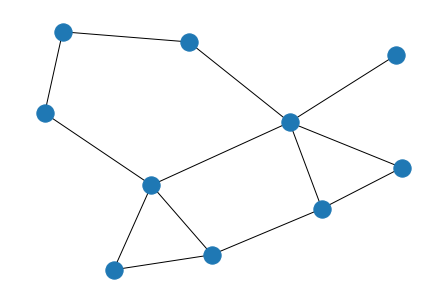

In [41]:
nx.draw(Graph)

In [42]:
#k refers to the number of clusters we wish to obtain
k=2
#n refers to the number of nodes in the graph
n=Graph.number_of_nodes()
#m refers to the factor-n/k times which gives the maximum size of the partition we're looking for
m=1 


In [27]:
#the weight given to the Lagrangian objective term
b=1
#fetching the laplacian matrix l=d-a from the graph object
l=nx.laplacian_matrix(Graph).toarray()
#L matrix is the block diagonal matrix of the laplacian matrices
L_diag=np.array([l for i in range(k)])
L=block_diag(*L_diag)
first_term=b*L

In [26]:
L

array([[ 5, -1, -1, -1, -1,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0],
       [-1,  2, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0],
       [-1, -1,  3,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0],
       [-1,  0,  0,  2,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0],
       [-1,  0,  0,  0,  2, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0],
       [ 0,  0,  0,  0, -1,  4, -1, -1, -1,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0],
       [ 0,  0,  0, -1,  0, -1,  3,  0,  0, -1,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, -1,  0,  2, -1,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0],
       [-1,  0,  0,  0,  0, -1,  0, -1,  3,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0],
       [ 0,  0, -1,  0,  0,  0, -1,  0,  0,  2,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0

In [28]:

#the list of weights given to the Lagrangian's first constraint term
a=[10 for x in range(k)]

i=np.ones((n,n))
aI_diag=np.array([i*a[j] for j in range(k)])
aI=block_diag(*aI_diag) #X_{t}aIX

identity=np.identity(n)
aId_diag=np.array([identity*a[j] for j in range(k)])
aId=block_diag(*aId_diag) #X_{t}aIdX

second_term=aI-(2*int(n*m/k))*aId





In [31]:
second_term

array([[-90.,  10.,  10.,  10.,  10.,  10.,  10.,  10.,  10.,  10.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [ 10., -90.,  10.,  10.,  10.,  10.,  10.,  10.,  10.,  10.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [ 10.,  10., -90.,  10.,  10.,  10.,  10.,  10.,  10.,  10.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [ 10.,  10.,  10., -90.,  10.,  10.,  10.,  10.,  10.,  10.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [ 10.,  10.,  10.,  10., -90.,  10.,  10.,  10.,  10.,  10.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [ 10.,  10.,  10.,  10.,  10., -90.,  10.,  10.,  10.,  10.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [ 10.,  10.,  10.,  10.,  10.,  10., -90.,  10.,  10.,  10.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [ 10.,  10.,  10.,  10.,  10.,  10

In [32]:
#the list of weights given to the Lagrangian's second constraint
def create_z_matrix(i,nodes,segments):
    diagonal_elements=[]
    for j in range(nodes*segments):
        if(int(j%nodes)+1==i):
            diagonal_elements.append(1)
        else:
            diagonal_elements.append(0)
    return np.diag(diagonal_elements)

In [33]:
#the list of weights given to the Lagrangian's second constraint
g=[10 for x in range(n)]
#making the B matrix
Z=[create_z_matrix(j,n,k) for j in range(1,n+1)]
I=np.ones((n*k,n*k))
B_=g[0]*np.matmul(np.matmul(Z[0],I),Z[0])
for j in range(1,n):
    B_=B_+g[j]*np.matmul(np.matmul(Z[j],I),Z[j])

G=np.diag(np.concatenate([g for i in range(k)]))

third_term=B_-2*G

In [37]:
third_term

array([[-10.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  10.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [  0., -10.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         10.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0., -10.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,  10.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0., -10.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,  10.,   0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0., -10.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,  10.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0., -10.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,  10.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0., -10.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,  10.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0

In [ ]:
#the labelling of nodes is important as our laplacian matrix uses this labelling 

In [ ]:
Q=first_term+second_term+third_term
Q_dict={}
for i in range(n*k):
    for j in range(n*k):
        Q_dict[(i,j)]=Q[i,j]

In [ ]:
# Run the QUBO on the solver from your config file
sampler = EmbeddingComposite(DWaveSampler())
response = sampler.sample_qubo(Q_dict,
                               chain_strength=chain_strength,
                               num_reads=num_reads,
                               label='Example - Graph Partitioning')

# See if the best solution found is feasible, and if so print the number of cut edges.
sample = response.record.sample[0]

In [ ]:
segment_colors=['red','green','blue','orange'] #we should put in as many colors as number of segments
color_map=[]
for node in G:
    for j in range(k):
        if sample[node+(j*n)]==1:
            color_map.append(segment_colors[j])
nx.draw(Graph,node_color=color_map,with_labels=True)
plt.show()


In [ ]:
# Copyright 2019 D-Wave Systems, Inc.
#
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
#     http://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# ------ Import necessary packages ----
import networkx as nx
import numpy as np 
import matplotlib.pyplot as plt 
from scipy.linalg import block_diag 
from scipy import sparse
from collections import defaultdict
from itertools import combinations
from dwave.system.samplers import DWaveSampler
from dwave.system.composites import EmbeddingComposite
import math

# ------- Set tunable parameters for the QUBO -------
num_reads = 1000
gamma = 80 #for adjusting the chain strength


# ------- Set up our graph -------
'''G = nx.gnp_random_graph(40, 0.3)'''
Graph=nx.karate_club_graph()
nx.draw(Graph,with_labels=True)
plt.show()
plt.savefig('input.png')
plt.close()
 
#------- Set problem parameters ----
#k refers to the number of clusters we wish to obtain
k=2
#n refers to the number of nodes in the graph
n=Graph.number_of_nodes()
#m refers to the factor-n/k times which gives the maximum size of the partition we're looking for
m=1 

print("Graph on {} nodes created with {} out of {} possible edges.".format(len(Graph.nodes), len(Graph.edges), len(Graph.nodes) * (len(Graph.nodes)-1) / 2))
print("This is known as the karate club graph")

# ------- Set up our QUBO dictionary -------

'''# Initialize our Q matrix
Q = defaultdict(int)

# Fill in Q matrix
for u, v in G.edges:
    Q[(u,u)] += 1
    Q[(v,v)] += 1
    Q[(u,v)] += -2

for i in G.nodes:
    Q[(i,i)] += gamma*(1-len(G.nodes))

for i, j in combinations(G.nodes, 2):
	Q[(i,j)] += 2*gamma'''

#the weight given to the Lagrangian objective term
b=1
#fetching the laplacian matrix l=d-a from the graph object
l=nx.laplacian_matrix(Graph).toarray()
#L matrix is the block diagonal matrix of the laplacian matrices
L_diag=np.array([l for i in range(k)])
L=block_diag(*L_diag)
first_term=b*L

#the list of weights given to the Lagrangian's first constraint term
a=[10 for x in range(k)]
i=np.ones((n,n))
aI_diag=np.array([i*a[j] for j in range(k)])
aI=block_diag(*aI_diag)               #X_{t}aIX
identity=np.identity(n)
aId_diag=np.array([identity*a[j] for j in range(k)])
aId=block_diag(*aId_diag)             #X_{t}aIdX
second_term=aI-(2*int(n*m/k))*aId

#the list of weights given to the Lagrangian's second constraint
def create_z_matrix(i,nodes,segments):
    diagonal_elements=[]
    for j in range(nodes*segments):
        if(int(j%nodes)+1==i):
            diagonal_elements.append(1)
        else:
            diagonal_elements.append(0)
    return np.diag(diagonal_elements)

#the list of weights given to the Lagrangian's second constraint
g=[5000 for x in range(n)]
#making the B matrix
Z=[create_z_matrix(j,n,k) for j in range(1,n+1)]
I=np.ones((n*k,n*k))
B_=g[0]*np.matmul(np.matmul(Z[0],I),Z[0])
for j in range(1,n):
    B_=B_+g[j]*np.matmul(np.matmul(Z[j],I),Z[j])
G=np.diag(np.concatenate([g for i in range(k)]))
third_term=B_-2*G

#defining the Q dictionary which will be submitted to the sampler
Q=first_term+second_term+third_term
Q_dict={}
for i in range(n*k):
    for j in range(n*k):
        Q_dict[(i,j)]=Q[i,j]

# ------- Run our QUBO on the QPU -------

# Set chain strength
chain_strength = gamma*n

# Run the QUBO on the solver from your config file
sampler = EmbeddingComposite(DWaveSampler())
response = sampler.sample_qubo(Q_dict,
                               chain_strength=chain_strength,
                               num_reads=num_reads,
                               label='Example - Graph Partitioning')
                            

# See if the best solution found is feasible, and if so print the number of cut edges.
sample = response.record.sample[0]

'''# In the case when n is odd, the set may have one more or one fewer nodes
if sum(sample) in [math.floor(len(G.nodes)/2), math.ceil(len(G.nodes)/2)]:
    num_cut_edges = 0
    for u, v in G.edges:
        num_cut_edges += sample[u] + sample[v] - 2*sample[u]*sample[v]
    print("Valid partition found with", num_cut_edges, "cut edges.")
else:
    print("Invalid partition.")'''

#coloring the graph into segments
segment_colors=['red','green','blue','orange'] #we should put in as many colors as number of segments
color_map=[]
valid_nodes=0
for node in Graph:
    node_assignment=0
    for j in range(k):
        #print(node+(j*n))
        node_assignment+=sample[node+(j*n)]
        if (sample[node+(j*n)]==1):
            color_map.append(segment_colors[j]) 
    print('Node{}:{}'.format(node,node_assignment))   
    if(node_assignment==1):
        valid_nodes+=1
print("{} nodes have been legitimately sorted into segments".format(valid_nodes))

nx.draw(Graph,node_color=color_map,with_labels=True)
plt.show()
plt.savefig('output.png')


In [3]:
pip install --upgrade pip


     ---------------------------------------- 2.1/2.1 MB 4.5 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 22.1.1
    Uninstalling pip-22.1.1:
      Successfully uninstalled pip-22.1.1
Note: you may need to restart the kernel to use updated packages.
